In [ ]:
!gdown 1YYZQMxLM6BJNoNTV3Y4iW7KJzhxMZx5c

Downloading...
From: https://drive.google.com/uc?id=1YYZQMxLM6BJNoNTV3Y4iW7KJzhxMZx5c
To: /content/logistic_regression.csv
100% 100M/100M [00:01<00:00, 90.7MB/s]


# Exploratory Data Analysis



loading the data in pandas dataframe

In [ ]:
import pandas as pd
df = pd.read_csv('logistic_regression.csv')

In [ ]:
df.head(5)

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0     0.0   20131.0       53.3      27.0                    f   
2     13.0     0.0   11987.0       92.2      26.0                    f   
3      6.0     0.0    5472.0       21.5      13.0                    f   
4     13.0     0.0   24584.0       69.8      43.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650  

[5 rows x 27 columns]

## Observations of the dataset

In [ ]:
df.shape

(396030, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

## Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def countplot(categories, angel=0, breadth=12):
  j = len(categories)
  fig, ax = plt.subplots(1,j, figsize=(breadth,4))
  for i,cat in enumerate(categories):
    plt.subplot(1,j,i+1)
    sns.countplot(data=df, x=cat)
    plt.xticks(rotation=angel)
    plt.ylabel('')


### categorical features analysis

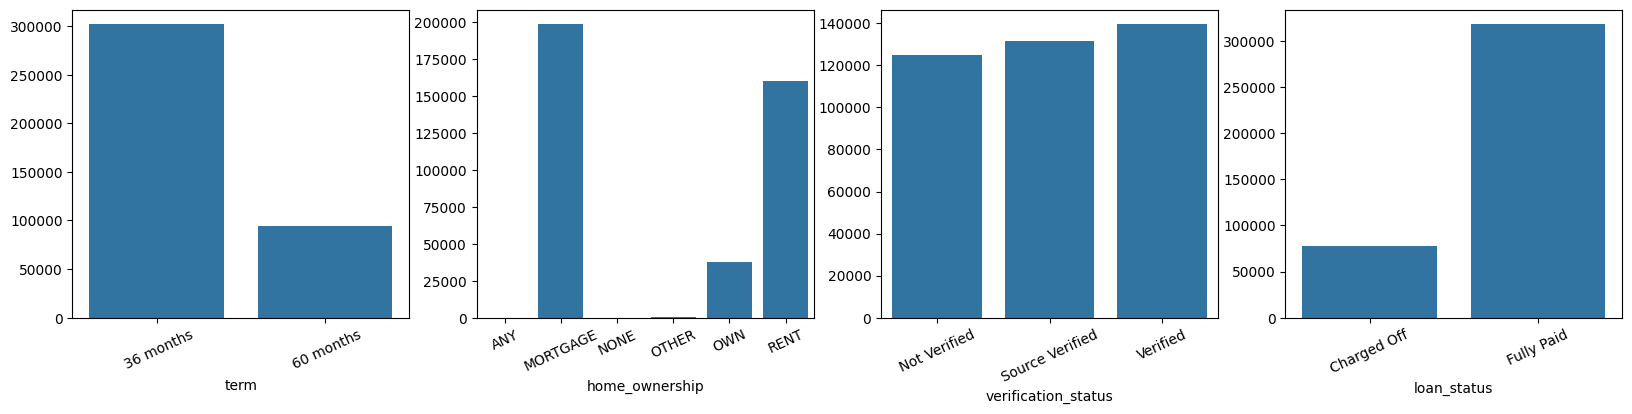

In [ ]:
countplot(['term','home_ownership', 'verification_status', 'loan_status'], breadth=20, angel=25)

In [ ]:
fully_paid = df[df['loan_status']=='Fully Paid']['loan_status'].count()
fully_paid_percent = (fully_paid/df.shape[0])*100
print(f'{fully_paid_percent}% of people Fully paid their loan')

80.38709188697825% of people Fully paid their loan


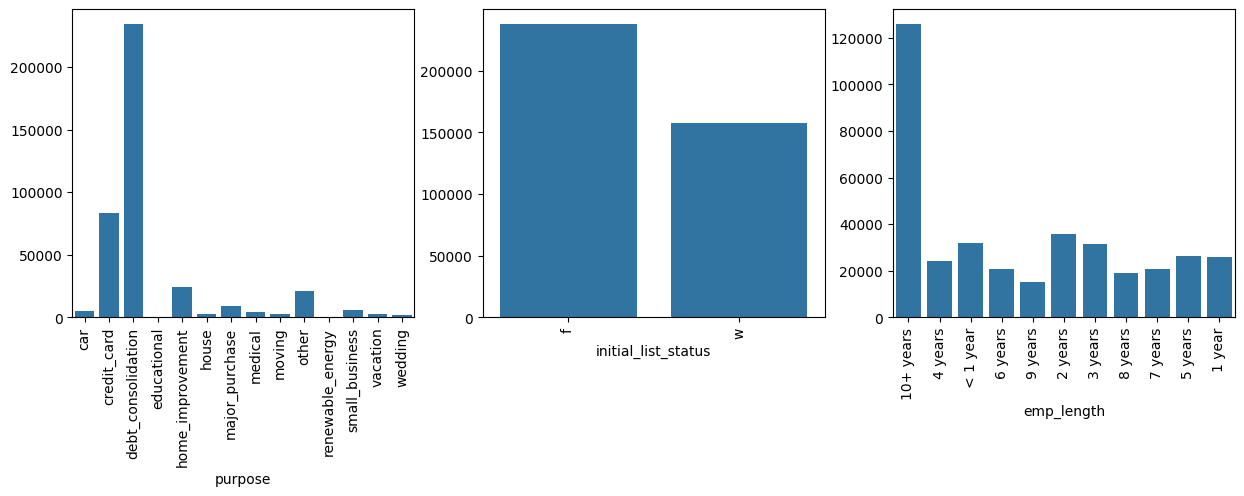

In [ ]:
countplot(['purpose', 'initial_list_status', 'emp_length'], breadth=15, angel=90)

<Axes: xlabel='sub_grade', ylabel='count'>

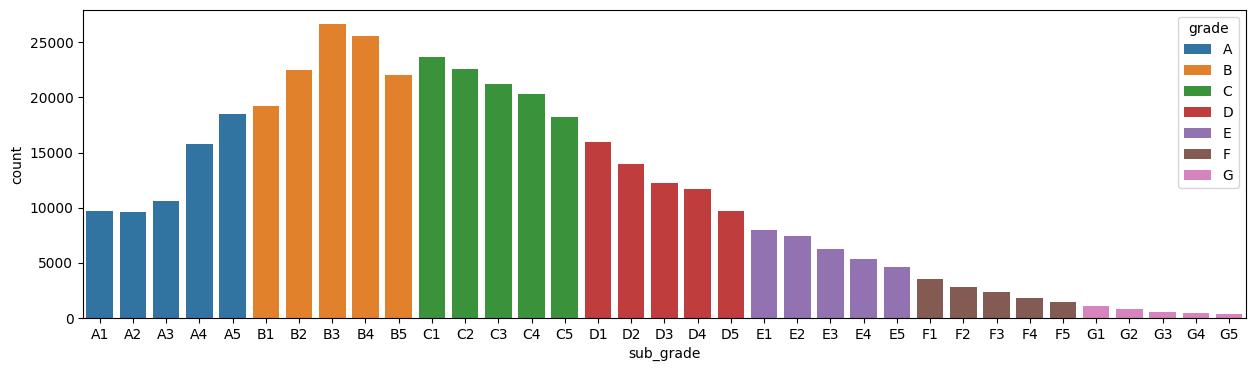

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x='sub_grade', hue='grade')

<Axes: xlabel='loan_status'>

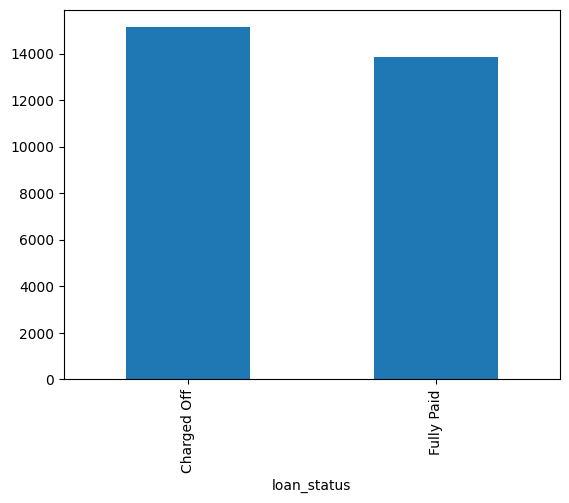

In [ ]:
data = df.groupby('loan_status')['loan_amnt'].mean()
data.plot(kind='bar')

<Axes: xlabel='grade', ylabel='count'>

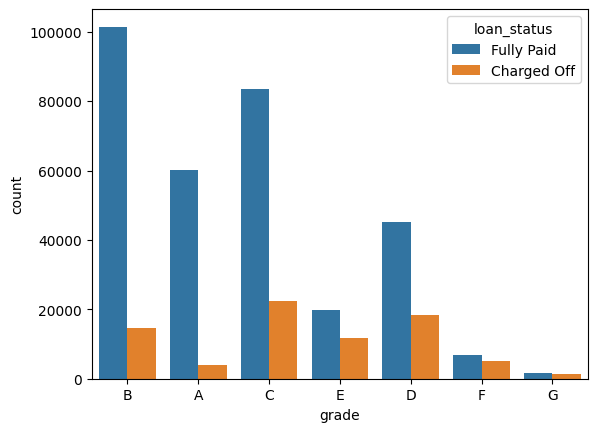

In [ ]:
sns.countplot(data=df, x='grade', hue='loan_status')

In [ ]:
jobs = df.groupby('emp_title')['loan_amnt'].sum()
job_amount_sorted = jobs.sort_values(ascending=False)

Text(0, 0.5, 'Loan Amount')

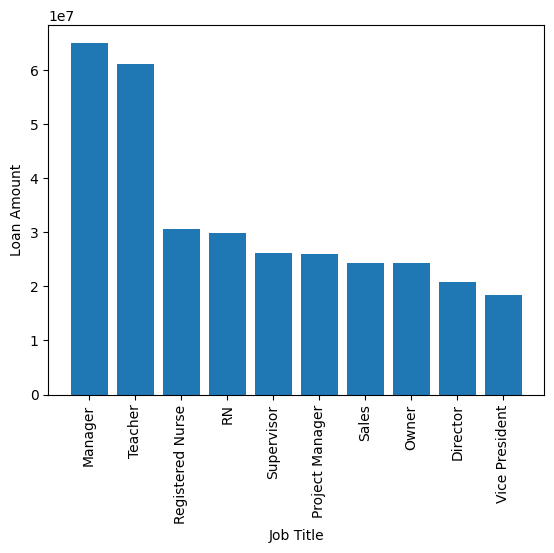

In [ ]:
plt.bar(job_amount_sorted.index[:10], job_amount_sorted[:10])
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Loan Amount')

### Numerical Features Analysis

In [ ]:
def box_hist_plot(num_features, angel=0, breadth=12):
  j = len(num_features)
  fig, ax = plt.subplots(2,j, figsize=(breadth,5))
  for i,feature in enumerate(num_features):
    plt.subplot(2,j,i+1)
    sns.boxplot(df[feature])
    plt.xticks(rotation=angel)
    plt.ylabel('')
  for i,feature in enumerate(num_features):
    plt.subplot(2,j,i+j+1)
    sns.histplot(data=df, x=feature)
    plt.xticks(rotation=angel)
    plt.ylabel('')

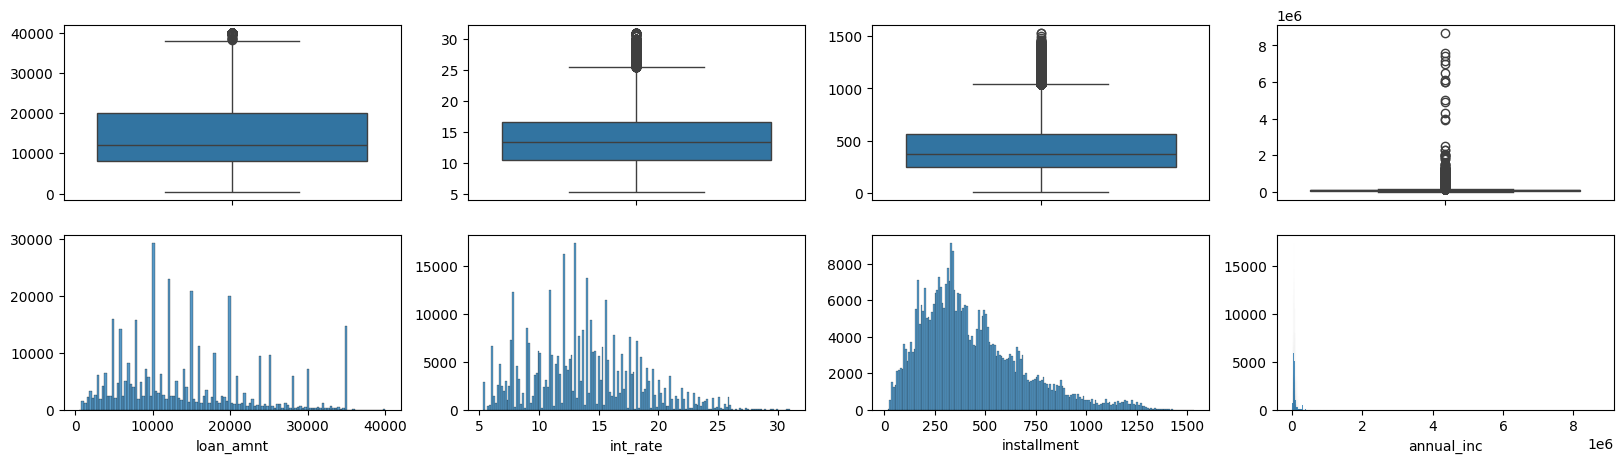

In [ ]:
box_hist_plot(['loan_amnt', 'int_rate', 'installment', 'annual_inc'], breadth=20)

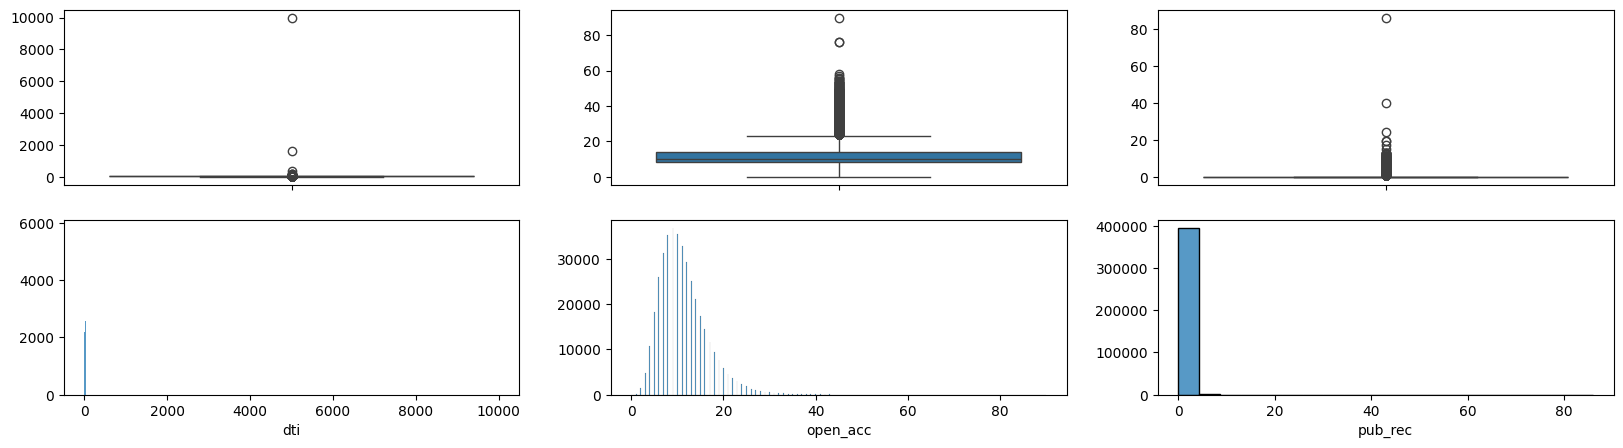

In [ ]:
box_hist_plot(['dti', 'open_acc', 'pub_rec'], breadth=20)

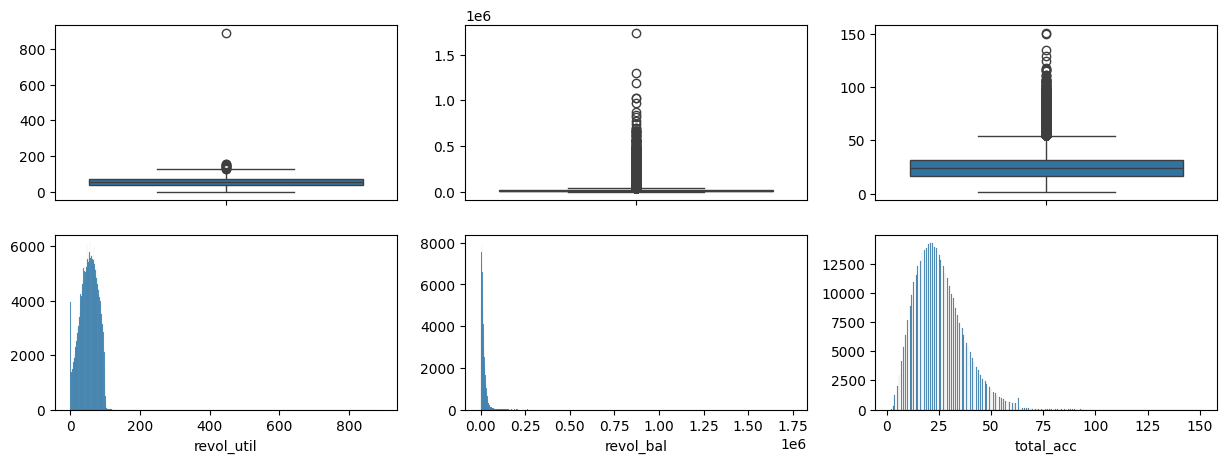

In [ ]:
box_hist_plot(['revol_util', 'revol_bal', 'total_acc', ], breadth=15)

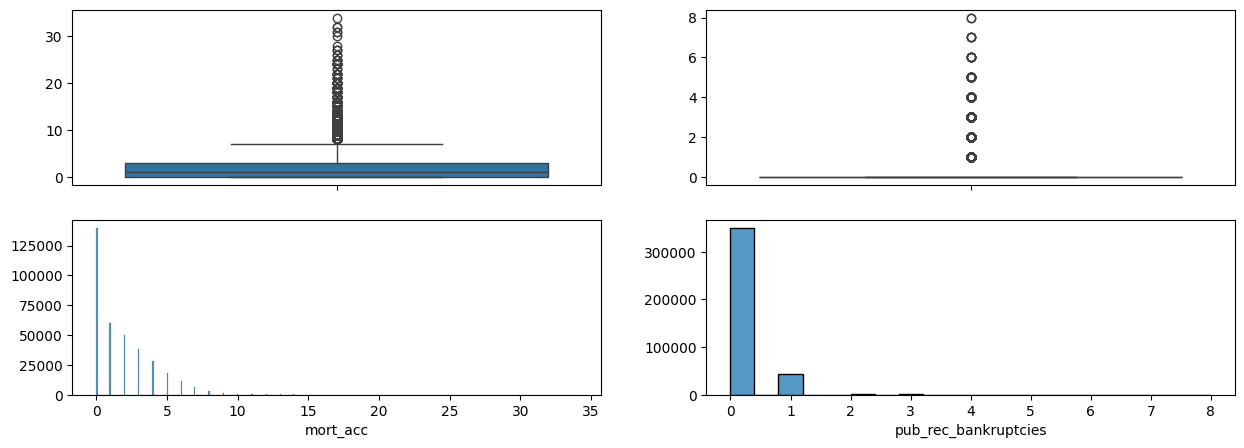

In [ ]:
box_hist_plot(['mort_acc', 'pub_rec_bankruptcies'], breadth=15)

## BI Variate Analysis

In [ ]:
def scatter_plot(f1, others, breadth=12):
  fig, ax  = plt.subplots(1,len(others), figsize=(breadth,4))
  for i, feature in enumerate(others):
    plt.subplot(1,len(others),i+1)
    # plt.legend('bottom-right')
    cor = df[feature].corr(df[f1])
    fg = sns.scatterplot(data=df, x=feature, y=f1, hue='loan_status')
    fg.legend(loc='lower right')
    fg.set_title(f'corr: {cor}')

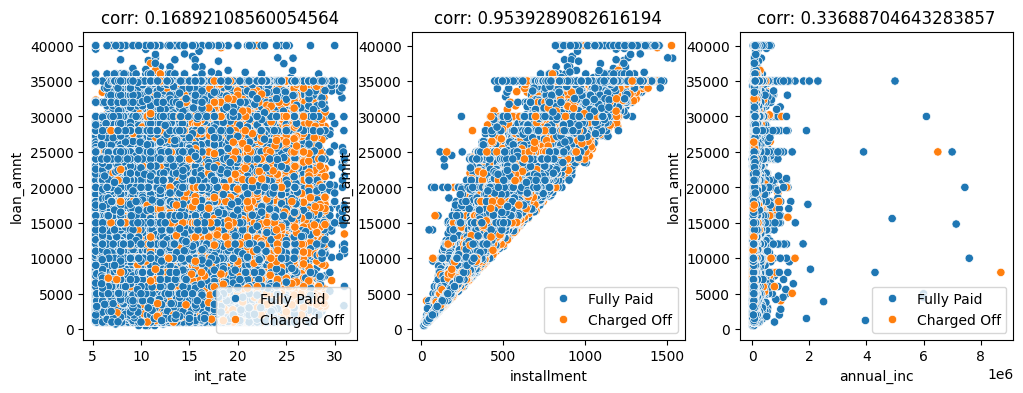

In [ ]:
scatter_plot('loan_amnt', ['int_rate', 'installment', 'annual_inc'])

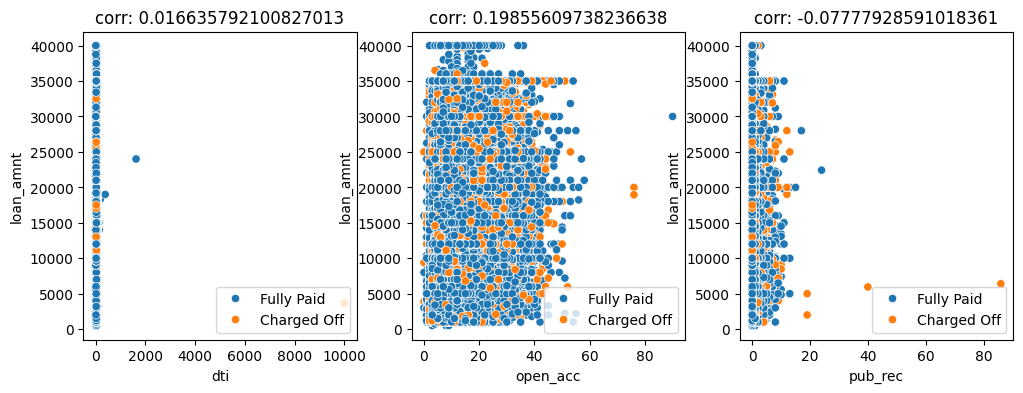

In [ ]:
scatter_plot('loan_amnt', ['dti', 'open_acc', 'pub_rec'])

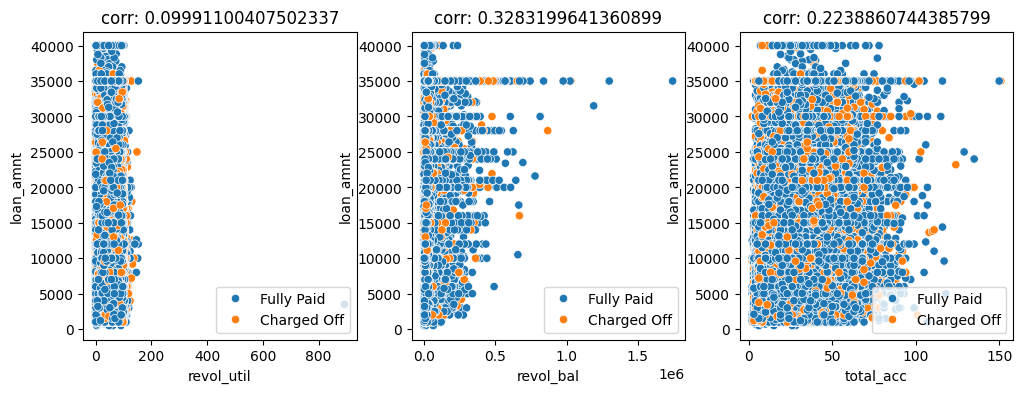

In [ ]:
scatter_plot('loan_amnt', ['revol_util', 'revol_bal', 'total_acc'])

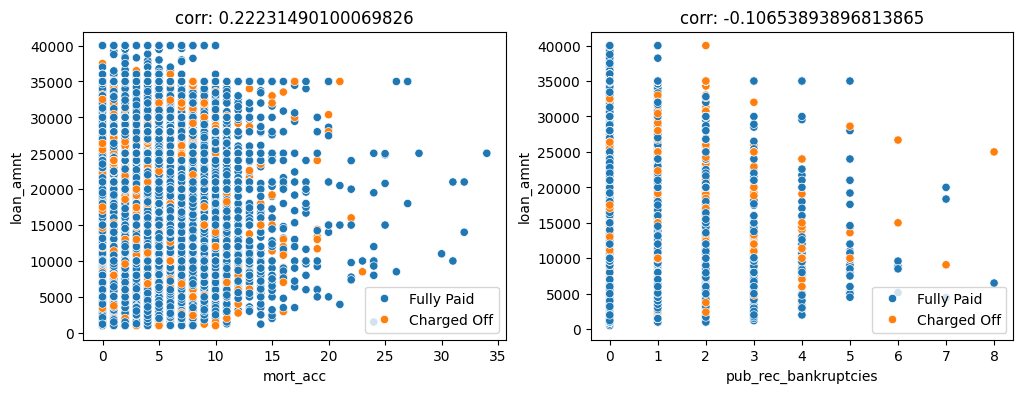

In [ ]:
scatter_plot('loan_amnt', ['mort_acc', 'pub_rec_bankruptcies'])

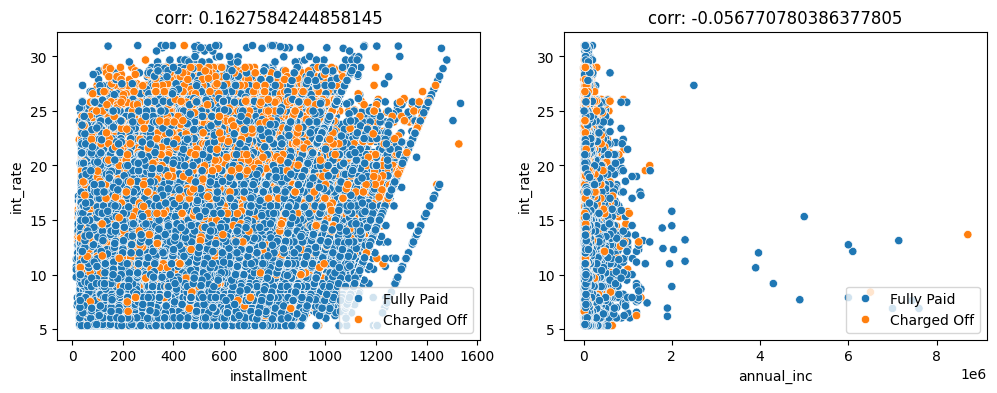

In [ ]:
scatter_plot('int_rate', ['installment', 'annual_inc'])

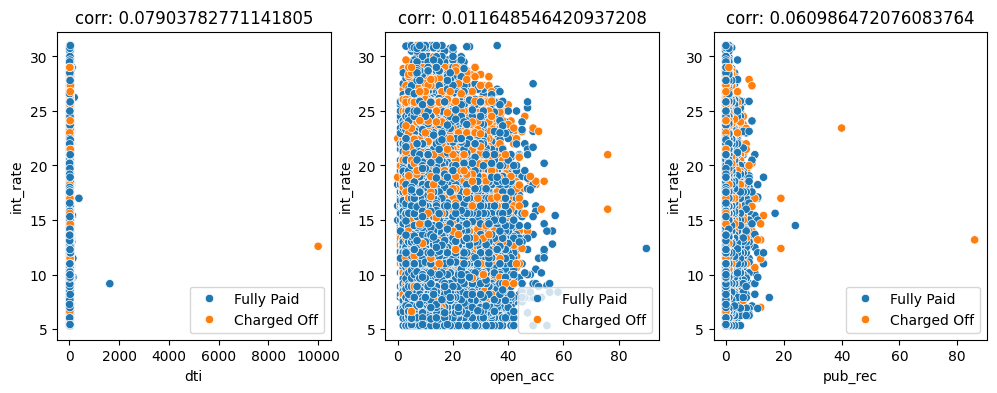

In [ ]:
scatter_plot('int_rate', ['dti', 'open_acc', 'pub_rec'])

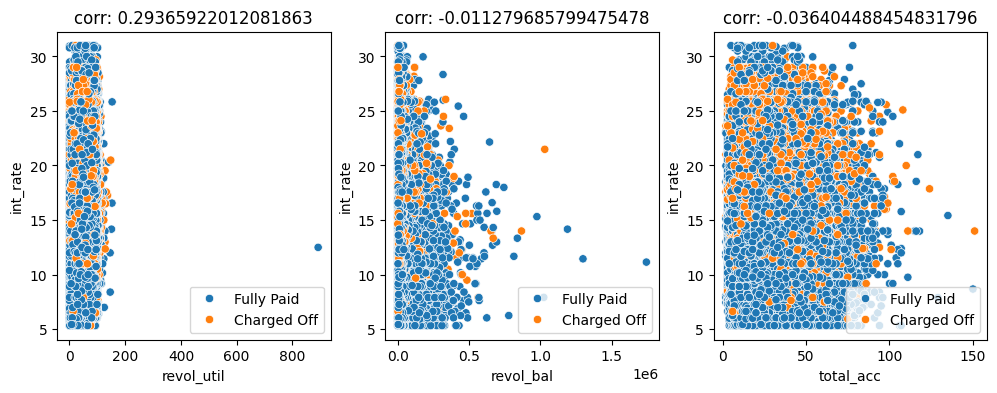

In [ ]:
scatter_plot('int_rate', ['revol_util', 'revol_bal', 'total_acc', ])

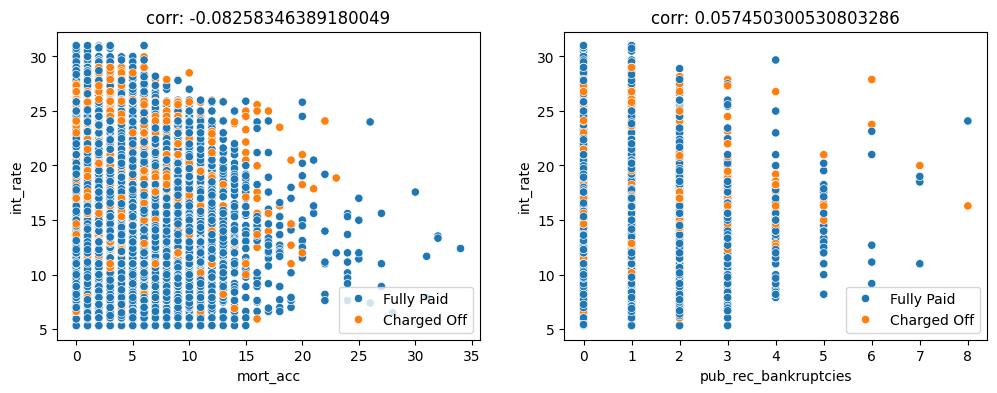

In [ ]:
scatter_plot('int_rate', ['mort_acc', 'pub_rec_bankruptcies'])

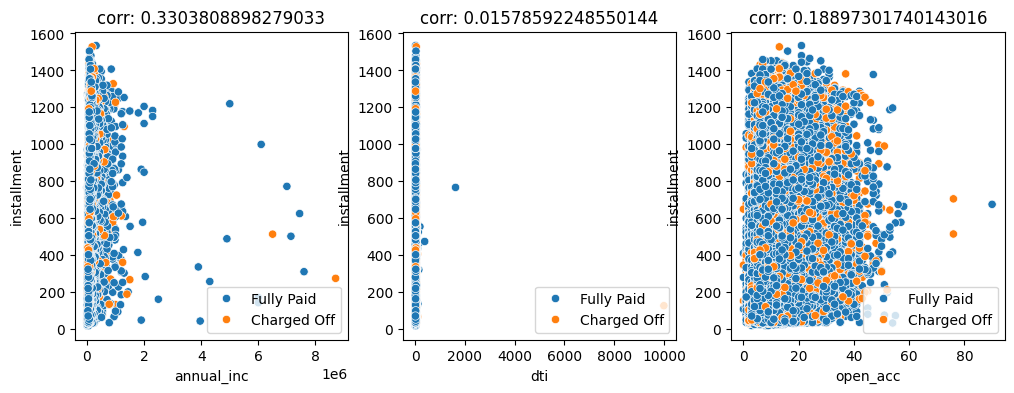

In [ ]:
scatter_plot('installment', ['annual_inc', 'dti', 'open_acc'])

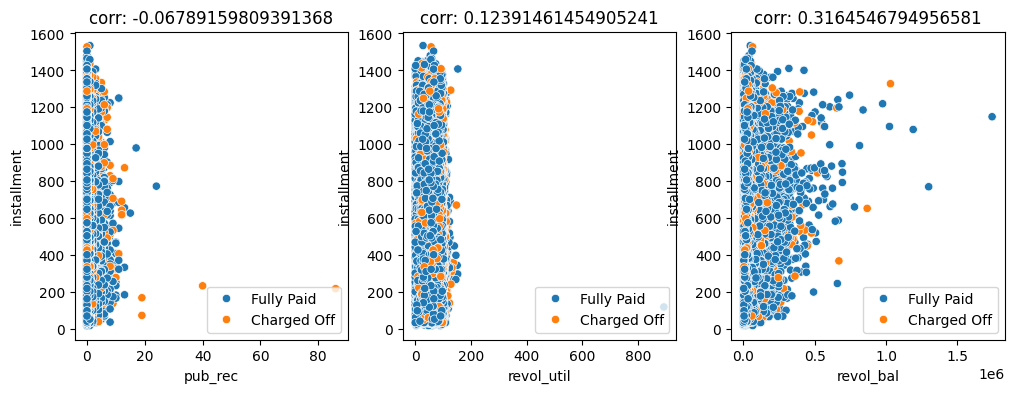

In [ ]:
scatter_plot('installment', ['pub_rec', 'revol_util', 'revol_bal'])

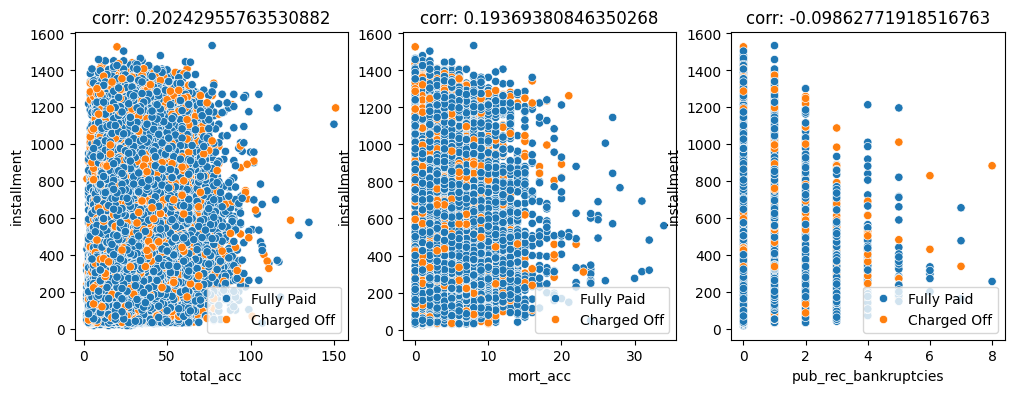

In [ ]:
scatter_plot('installment', ['total_acc', 'mort_acc', 'pub_rec_bankruptcies'])

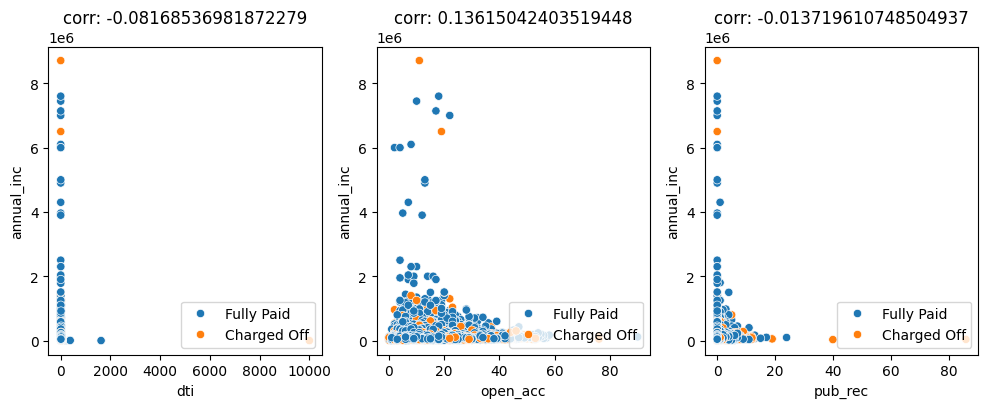

In [ ]:
scatter_plot('annual_inc', ['dti', 'open_acc', 'pub_rec'])

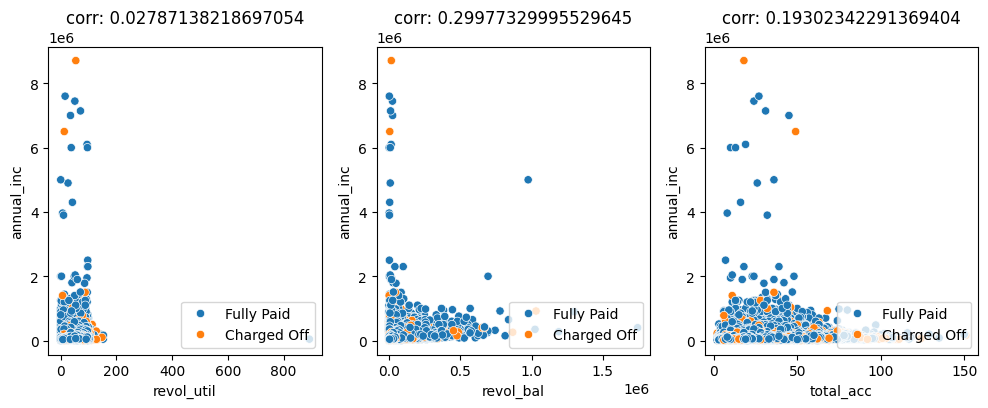

In [ ]:
scatter_plot('annual_inc', ['revol_util', 'revol_bal', 'total_acc'])

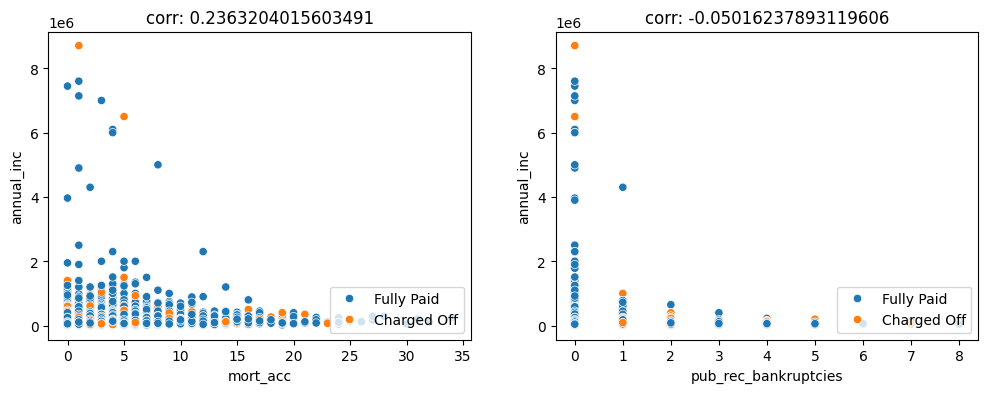

In [ ]:
scatter_plot('annual_inc', ['mort_acc', 'pub_rec_bankruptcies'])

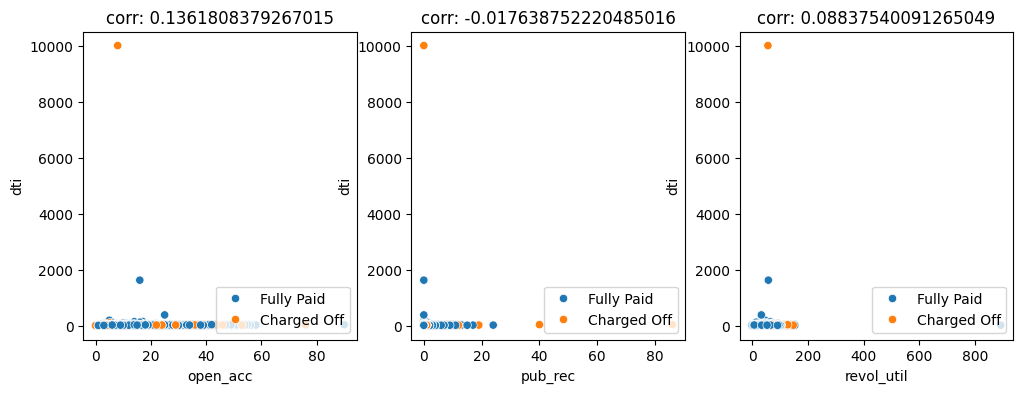

In [ ]:
scatter_plot('dti', ['open_acc', 'pub_rec', 'revol_util'])

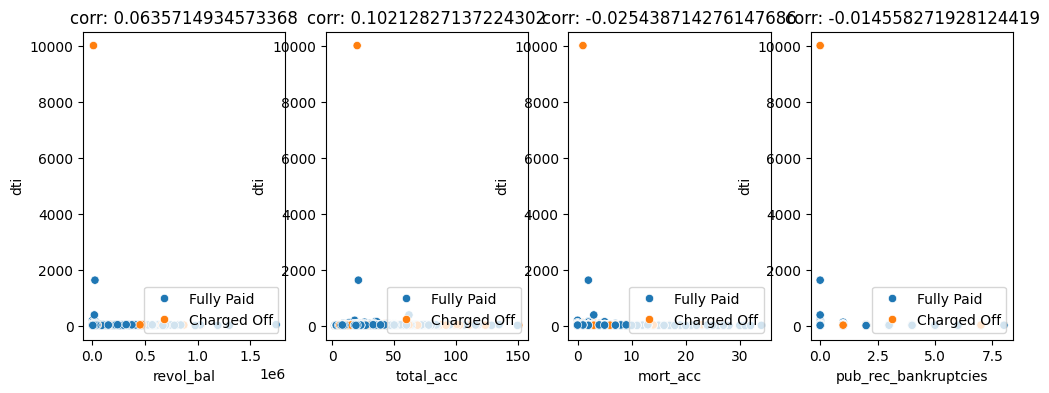

In [ ]:
scatter_plot('dti', ['revol_bal', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'])

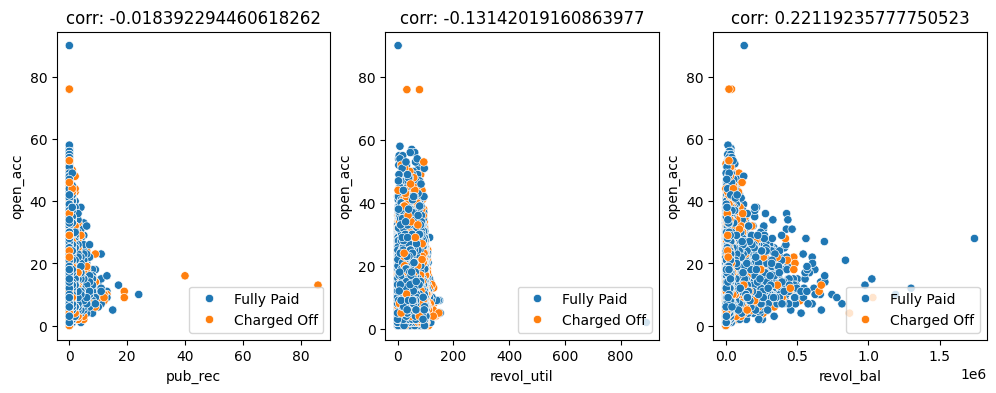

In [ ]:
scatter_plot('open_acc', ['pub_rec', 'revol_util', 'revol_bal'])

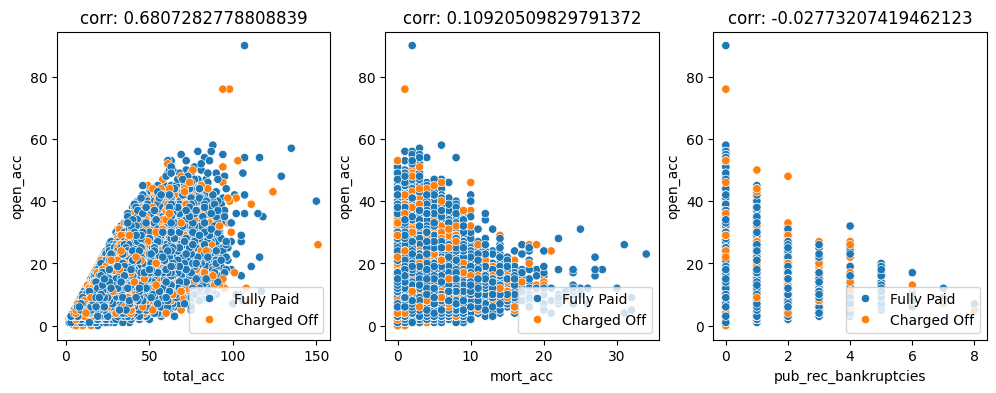

In [ ]:
scatter_plot('open_acc', ['total_acc', 'mort_acc', 'pub_rec_bankruptcies'])

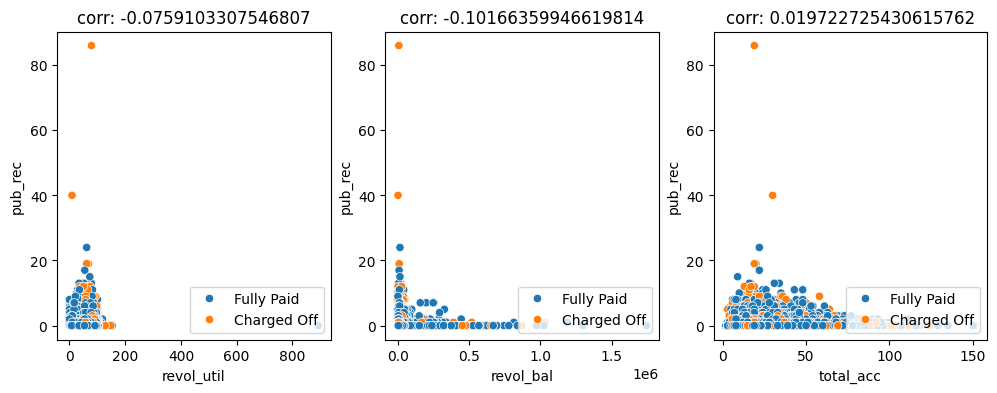

In [ ]:
scatter_plot('pub_rec', ['revol_util', 'revol_bal', 'total_acc'])

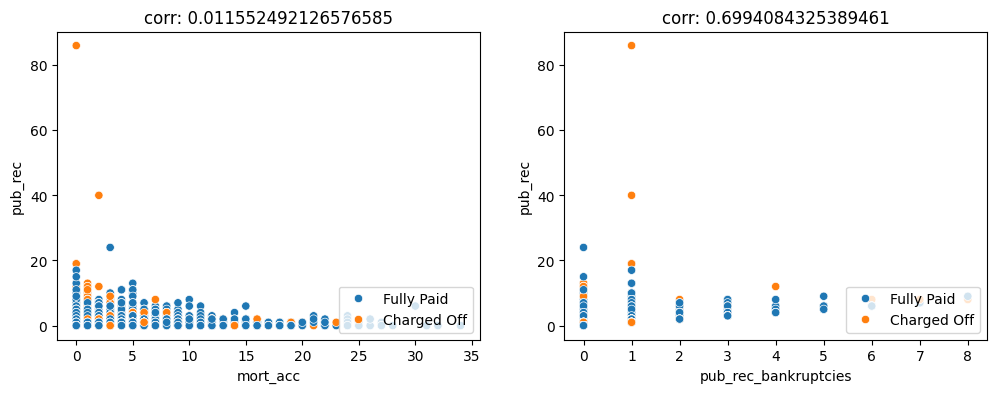

In [ ]:
scatter_plot('pub_rec', ['mort_acc', 'pub_rec_bankruptcies'])

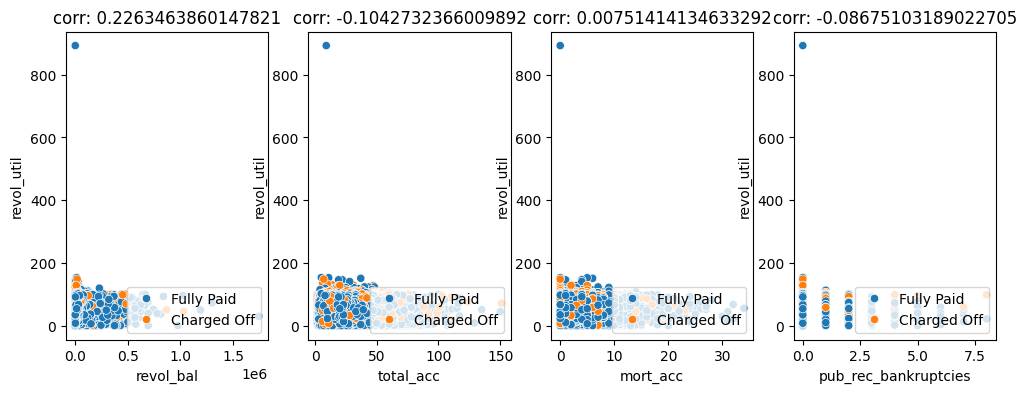

In [ ]:
scatter_plot('revol_util', ['revol_bal', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'])

In [ ]:
df_copy = df.copy()

# Data Processing

In [ ]:
import numpy as np

def iqr(ls):
  q1 = np.percentile(ls, 25)
  q3 = np.percentile(ls, 75)
  max_val = ls.max()
  min_val = ls.min()
  range = q3 - q1
  uw = q3+1.5*range
  lw = q1-1.5*range
  upper_bound = min(max_val, uw)
  lower_bound = max(min_val, lw)

  return lower_bound, upper_bound

In [ ]:
def treat_outlier(features):
  for feature in features:
    lb, ub = iqr(df_copy[feature])
    def check(x):
      if x>ub: return ub
      elif lb<x<=ub: return x
      else: lb
    df_copy[feature] = df_copy[feature].apply(check)

In [ ]:
def box_plot(num_features, angel=0, breadth=12):
  j = len(num_features)
  fig, ax = plt.subplots(1,j, figsize=(breadth,5))
  for i,feature in enumerate(num_features):
    plt.subplot(1,j,i+1)
    fig = sns.boxplot(df_copy[feature])
    fig.set_title(feature)
    plt.xticks(rotation=angel)
    plt.ylabel('')

## Outlier Treatment

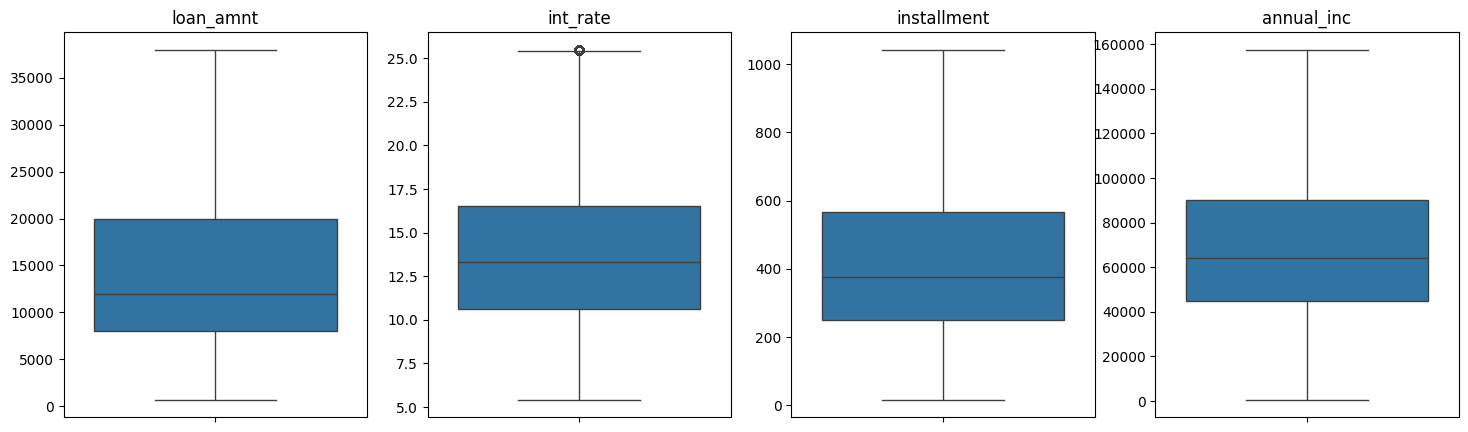

In [ ]:
treat_outlier(['loan_amnt', 'int_rate', 'installment', 'annual_inc'])
box_plot(['loan_amnt', 'int_rate', 'installment', 'annual_inc'], breadth=18)

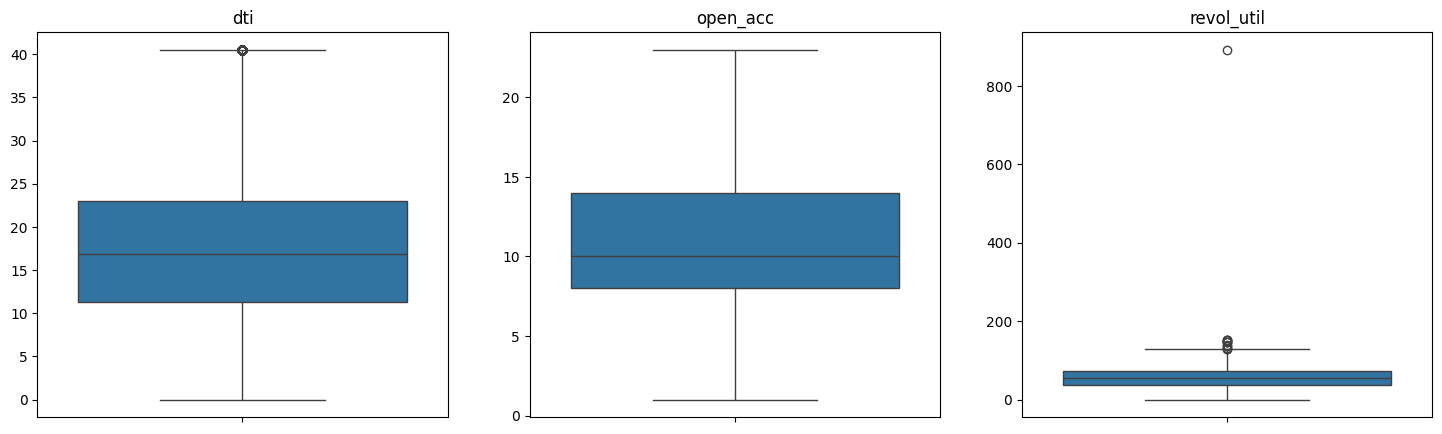

In [ ]:
treat_outlier(['dti', 'open_acc', 'revol_util'])
box_plot(['dti', 'open_acc', 'revol_util'], breadth=18)

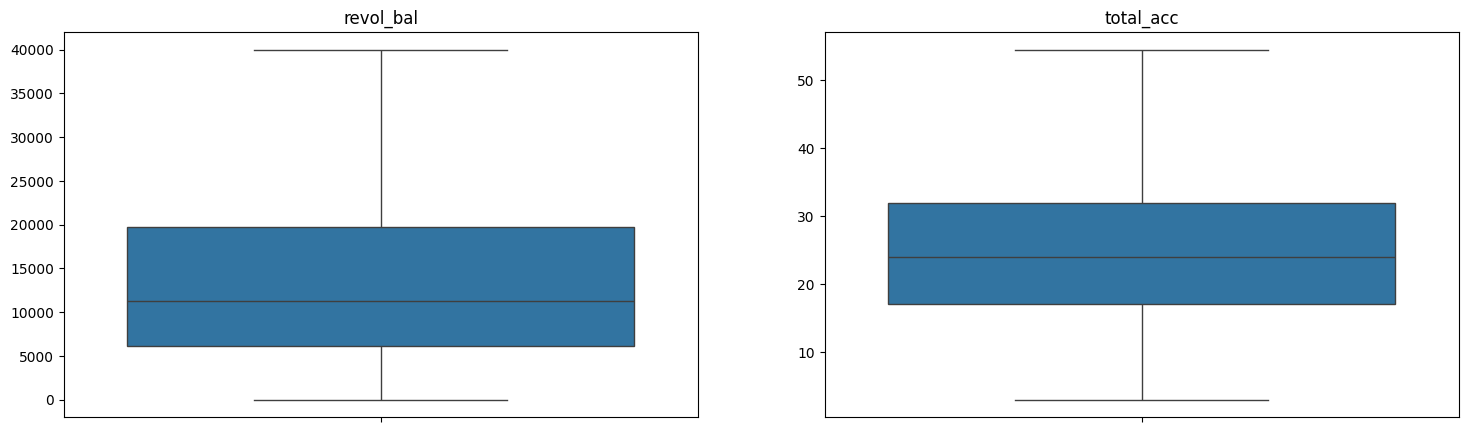

In [ ]:
treat_outlier(['revol_bal', 'total_acc'])
box_plot(['revol_bal', 'total_acc'], breadth=18)

## Encoding

In [ ]:
def state(text):
  text_ls = text.split()
  return text_ls[-2]

df_copy['state'] = df_copy['address'].apply(state)

In [ ]:
df_copy['mort_acc'] = df_copy['mort_acc'].apply(lambda x: 1 if x>1 else 0)
df_copy['pub_rec'] = df_copy['pub_rec'].apply(lambda x: 1 if x>1 else 0)
df_copy['pub_rec_bankruptcies'] = df_copy['pub_rec_bankruptcies'].apply(lambda x: 1 if x>1 else 0)

In [ ]:
def emp_len(st):
  if not pd.isna(st):
    strings = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
    nums = [i for i in range(11)]
    idx = strings.index(st)
    return nums[idx]

  else:
    return st

df_copy['emp_length'] = df_copy['emp_length'].apply(emp_len)

In [ ]:
df_copy['issue_d'] = pd.to_datetime(df_copy['issue_d'])
df_copy['day'] = df_copy['issue_d'].dt.day
df_copy['month'] = df_copy['issue_d'].dt.month
df_copy['year'] = df_copy['issue_d'].dt.year

In [ ]:
def term_encoder(x):
  if x==' 36 months':
    return 0
  else:
    return 1

df_copy['term'] = df_copy['term'].apply(term_encoder)

In [ ]:
def sub_grade(arr):
  r = int(arr[-1])
  if r>3:
    return 1 + 5-r
  elif r<3:
    return 6-r
  else:
    return 3

df_copy['sub_grade'] = df_copy['sub_grade'].apply(sub_grade)

def grade_encoder(x):
  grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
  nums = [i for i in range(1,8)]
  idx = grades.index(x)
  return nums[idx]

df_copy['grade'] = df_copy['grade'].apply(grade_encoder)

In [ ]:
df_copy['loan_status'] = df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [ ]:
df_copy['home_ownership'] = df_copy.groupby('home_ownership')['loan_status'].transform('mean')

In [ ]:
df_copy['emp_title'] = df_copy.groupby('emp_title')['loan_status'].transform('mean')

In [ ]:
df_copy['verification_status'] = df_copy.groupby('verification_status')['loan_status'].transform('mean')

In [ ]:
df_copy['earliest_cr_line'] = pd.to_datetime(df_copy['earliest_cr_line'])
df_copy['credit_history_days'] = df_copy['issue_d'] - df_copy['earliest_cr_line']
df_copy['credit_history_days'] = df_copy['credit_history_days'].dt.days

In [ ]:
df_copy['purpose'] = df_copy.groupby('purpose')['loan_status'].transform('mean')

In [ ]:
df_copy['state'] = df_copy.groupby('state')['loan_status'].transform('mean')

In [ ]:
df_copy['initial_list_status'] = df['initial_list_status'].apply(lambda x: 1 if x=='w' else 0)

In [ ]:
df_copy.drop(columns=['issue_d', 'title', 'earliest_cr_line', 'application_type', 'address'], inplace=True)

In [ ]:
df_copy.head(5)

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_title  \
0    10000.0     0     11.44       329.48      2          2   0.247191   
1     8000.0     0     11.99       265.68      2          1   0.333333   
2    15600.0     0     10.49       506.97      2          3   0.181818   
3     7200.0     0      6.49       220.65      1          4   0.000000   
4    24375.0     1     17.27       609.33      3          1   1.000000   

   emp_length  home_ownership  annual_inc  ...  revol_util  total_acc  \
0        10.0        0.226622    117000.0  ...        41.8       25.0   
1         4.0        0.169561     65000.0  ...        53.3       27.0   
2         0.0        0.226622     43057.0  ...        92.2       26.0   
3         6.0        0.226622     54000.0  ...        21.5       13.0   
4         9.0        0.169561     55000.0  ...        69.8       43.0   

   initial_list_status  mort_acc  pub_rec_bankruptcies     state  day  month  \
0                    1         0                     0  0.192013    1      1   
1                    0         1                     0  0.197038    1      1   
2                    0         0                     0  0.204061    1      1   
3                    0         0                     0  0.196098    1     11   
4                    0         0                     0  0.195101    1      4   

   year  credit_history_days  
0  2015                 8980  
1  2015                 3836  
2  2015                 2710  
3  2014                 2983  
4  2013                 5145  

[5 rows x 27 columns]

In [ ]:
y = df_copy['loan_status']
X = df_copy.drop(columns=['loan_status'])

In [ ]:
X.shape, y.shape

((396030, 26), (396030,))

## Missing value Tratment

In [ ]:
X.isna().sum()

loan_amnt                   4
term                        0
int_rate                 2440
installment                 1
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  1
verification_status         0
purpose                     0
dti                       313
open_acc                    6
pub_rec                     0
revol_bal                2128
revol_util               2489
total_acc                  18
initial_list_status         0
mort_acc                    0
pub_rec_bankruptcies        0
state                       0
day                         0
month                       0
year                        0
credit_history_days         0
dtype: int64

In [ ]:
feats = ['loan_amnt', 'int_rate', 'installment', 'emp_title', 'emp_length', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']
for feat in feats:
  X[feat] = X[feat].fillna(X[feat].median())

# Model Building

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

## Data Scaling and model fitting

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression(C=1/100, penalty='l2')
logreg.fit(X_train,y_train)

LogisticRegression(C=0.01)

In [ ]:
def accuracy(y_true, y_pred):
  return np.sum(y_true==y_pred)/y_true.shape[0]

accuracy(y_train,logreg.predict(X_train))

0.884541575133197

## Hyper parameter tuning

In [ ]:
train_scores = []
val_scores = []

for la in np.arange(100,2000,100):
  logreg = LogisticRegression(C=1/la)
  logreg.fit(X_train,y_train)
  train_score = accuracy(y_train, logreg.predict(X_train))
  val_score = accuracy(y_val, logreg.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

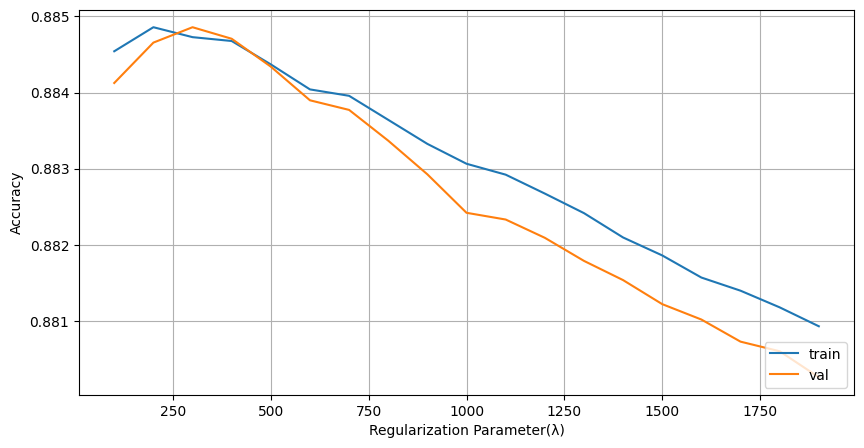

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(100, 2000, 100)), train_scores, label="train")
plt.plot(list(np.arange(100, 2000, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

## Model performance

In [ ]:
model = LogisticRegression(C=1/300)
model.fit(X_train,y_train)

print('Train accuracy: ', accuracy(y_train,model.predict(X_train)))
print('Val accuracy: ', accuracy(y_val, model.predict(X_val)))
print('Test accuracy: ', accuracy(y_test, model.predict(X_test)))

Train accuracy:  0.8847267462902642
Val accuracy:  0.8848572077872888
Test accuracy:  0.8832790445168295


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[62671,   885],
       [ 8360,  7290]])

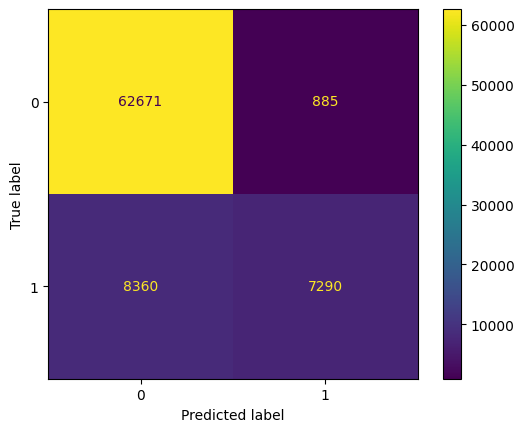

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

print(f'precision Score:{precision_score(y_test,y_pred)}')
print(f'recall Score:{recall_score(y_test,y_pred)}')
print(f'f1Score:{f1_score(y_test,y_pred)}')

precision Score:0.8917431192660551
recall Score:0.465814696485623
f1Score:0.6119622245540398


## Oversampling for imbalance Data

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

# Perform SMOTE on the training data
print('Before SMOTE')
print(y_train.value_counts())

X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('After SMOTE')
print(y_sm.value_counts())

Before SMOTE
0    191163
1     46455
Name: loan_status, dtype: int64
After SMOTE
0    191163
1    191163
Name: loan_status, dtype: int64


## final Model Building

In [ ]:
train_scores = []
val_scores = []

for la in np.arange(2000,5000,100):
  logreg = LogisticRegression(C=1/la)
  logreg.fit(X_sm,y_sm)
  train_score = accuracy(y_train, logreg.predict(X_train))
  val_score = accuracy(y_val, logreg.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

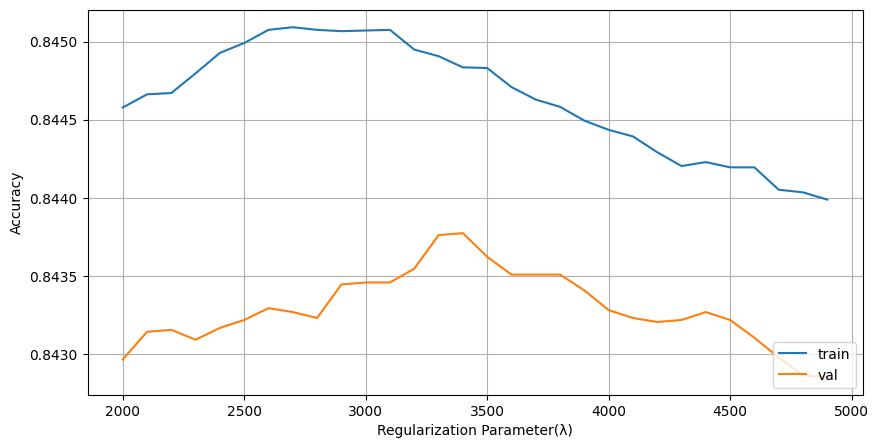

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(2000, 5000, 100)), train_scores, label="train")
plt.plot(list(np.arange(2000, 5000, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
model = LogisticRegression(C=1/3300)
model.fit(X_sm,y_sm)

LogisticRegression(C=0.00030303030303030303)

## final model Performance

In [ ]:
print('Train accuracy: ', accuracy(y_train,model.predict(X_train)))
print('Val accuracy: ', accuracy(y_val, model.predict(X_val)))
print('Test accuracy: ', accuracy(y_test, model.predict(X_test)))

Train accuracy:  0.844906530650035
Val accuracy:  0.8437618362245285
Test accuracy:  0.8425876827513067


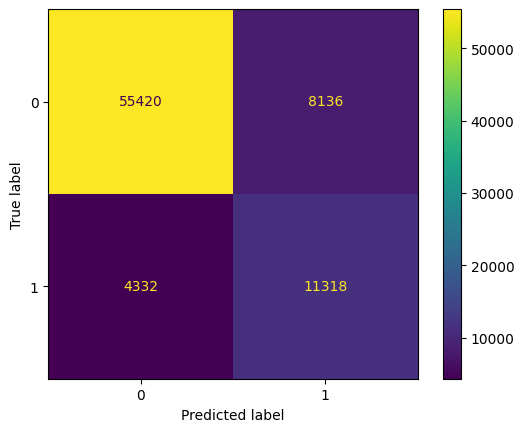

In [ ]:
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
print(f'precision Score:{precision_score(y_test,y_pred)}')
print(f'recall Score:{recall_score(y_test,y_pred)}')
print(f'f1Score:{f1_score(y_test,y_pred)}')

precision Score:0.5817826668037421
recall Score:0.7231948881789138
f1Score:0.6448268003646308


In [ ]:
y_train_pred = model.predict(X_sm)

In [ ]:
print(f'precision Score:{precision_score(y_sm,y_train_pred)}')
print(f'recall Score:{recall_score(y_sm,y_train_pred)}')
print(f'f1Score:{f1_score(y_sm,y_train_pred)}')

precision Score:0.8410694966771418
recall Score:0.7686320051474396
f1Score:0.8032208865637863


### ROC Curve and Area under Curve

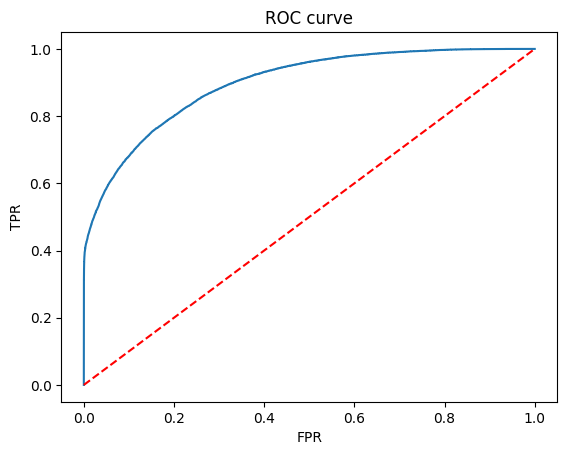

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

probability = model.predict_proba(X_test)
probabilites = probability[:,1]

fpr, tpr, thr = roc_curve(y_test,probabilites)

plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
# AUC
roc_auc_score(y_test,probabilites)

0.8966901278176455

### Precision Recall curve and AUC

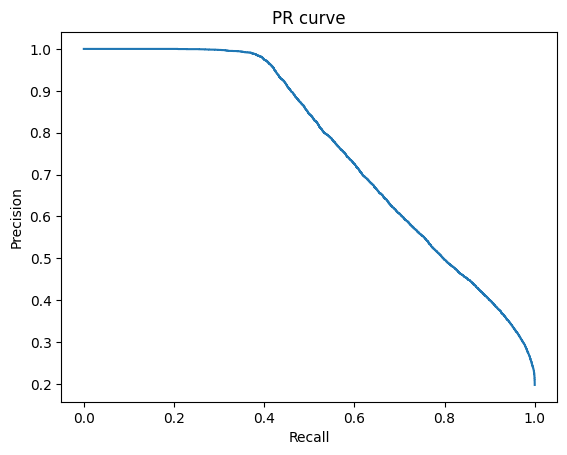

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, thr = precision_recall_curve(y_test, probabilites)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.7685646651313565

## Importance of different featurs and weights

<Axes: xlabel='features', ylabel='weights'>

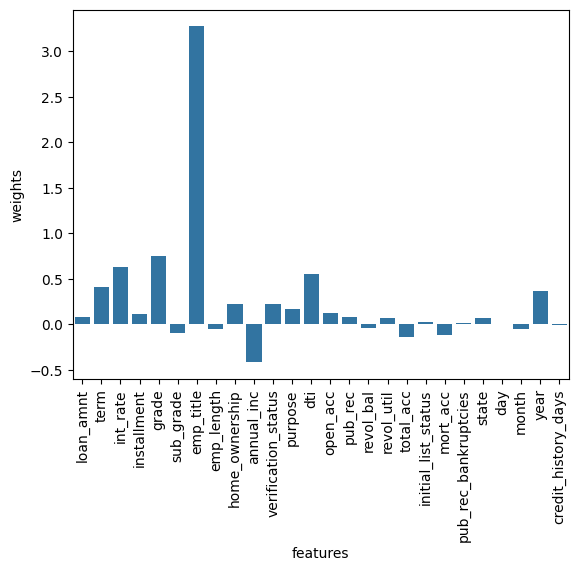

In [ ]:
ls = pd.DataFrame(list(zip(X.columns,model.coef_[0])), columns=['features', 'weights'])
plt.xticks(rotation=90)
sns.barplot(data=ls, x='features', y='weights')